In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import matplotlib
from scipy.optimize import curve_fit


%matplotlib inline 


In [149]:
full_cat = pd.read_csv("/home/kuiack/fullcat_fits.csv", names=["slope","slope_err","int","int_err","N_match"])
half_cat = pd.read_csv("/home/kuiack/fit_results.csv", names=["slope","slope_err","int","int_err","N_match"])

/afhome/kuiack/trapenv/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/afhome/kuiack/trapenv/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
/afhome/kuiack/trapenv/lib/python2.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt


[104.4984677   -1.08822568]
[ 4.65424393 -1.5979209 ]


/afhome/kuiack/trapenv/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in sqrt
/afhome/kuiack/trapenv/lib/python2.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in sqrt
/afhome/kuiack/trapenv/lib/python2.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in sqrt


[107.58097597  -1.09464798]


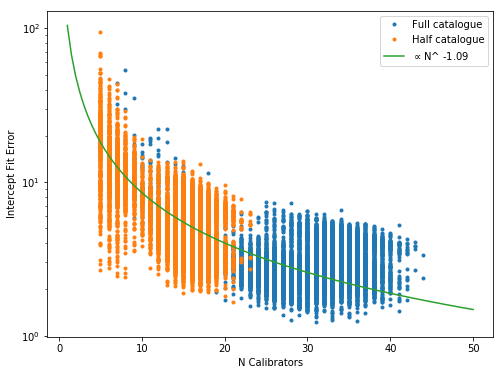

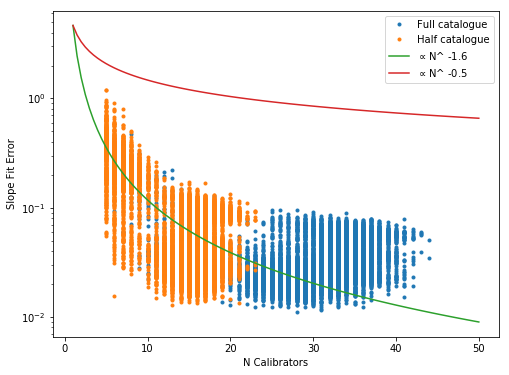

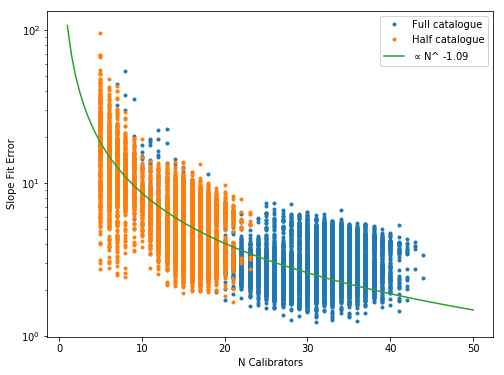

In [150]:
def powlaw(x,a,b):
    return a*x**(b)

plt.figure(figsize=(8,6))

x_range = np.linspace(1,50,100)

x = np.append(full_cat.N_match,half_cat.N_match)

y = np.sqrt(np.append(full_cat.int_err,half_cat.int_err))

index = (~np.isnan(x) * ~np.isnan(y) * np.isfinite(x) * np.isfinite(y) )
x = x[index]
y = y[index]

fit, cov = curve_fit(powlaw,x,y)

plt.plot(full_cat.N_match, np.sqrt(full_cat.int_err),'.', label="Full catalogue")
plt.plot(half_cat.N_match, np.sqrt(half_cat.int_err),'.', label="Half catalogue")
plt.plot(x_range, powlaw(x_range, fit[0], fit[1]), label=r"$\propto$N^ {}".format(round(fit[1],2)))
# plt.plot(x_range, powlaw(x_range,fit[0],-0.5))
plt.yscale("log")


plt.legend()
plt.xlabel("N Calibrators")
plt.ylabel("Intercept Fit Error")
print fit



plt.figure(figsize=(8,6))

# x_range = np.linspace(1,50,100)

x = np.append(full_cat.N_match,half_cat.N_match)
y = np.sqrt(np.append(full_cat.slope_err,half_cat.slope_err))

index = (~np.isnan(x) * ~np.isnan(y) * np.isfinite(x) * np.isfinite(y) )

x = x[index]
y = y[index]

fit, cov = curve_fit(powlaw,x,y)

plt.plot(full_cat.N_match, np.sqrt(full_cat.slope_err),'.', label="Full catalogue")
plt.plot(half_cat.N_match, np.sqrt(half_cat.slope_err),'.', label="Half catalogue")
plt.plot(x_range, powlaw(x_range, fit[0], fit[1]), label=r"$\propto$N^ {}".format(round(fit[1],2)))

plt.plot(x_range, powlaw(x_range, fit[0], -0.5), label=r"$\propto$N^ {}".format(round(-0.5,2)))

# plt.plot(x_range, powlaw(x_range,fit[0],-0.5))
plt.yscale("log")
plt.legend()

plt.xlabel("N Calibrators")
plt.ylabel("Slope Fit Error")
print fit



plt.figure(figsize=(8,6))

# x_range = np.linspace(1,50,100)

x = np.append(full_cat.N_match,half_cat.N_match)
y = np.sqrt(np.append(full_cat.slope_err,half_cat.slope_err)) + np.sqrt(np.append(full_cat.int_err,half_cat.int_err))

index = (~np.isnan(x) * ~np.isnan(y) * np.isfinite(x) * np.isfinite(y) )

x = x[index]
y = y[index]

fit, cov = curve_fit(powlaw,x,y)

plt.plot(full_cat.N_match, np.sqrt(full_cat.int_err)+np.sqrt(full_cat.slope_err) ,'.', label="Full catalogue")
plt.plot(half_cat.N_match, np.sqrt(half_cat.int_err)+np.sqrt(half_cat.slope_err),'.', label="Half catalogue")
plt.plot(x_range, powlaw(x_range, fit[0], fit[1]), label=r"$\propto$N^ {}".format(round(fit[1],2)))

# plt.plot(x_range, powlaw(x_range, fit[0], -0.5), label=r"$\propto$N^ {}".format(round(-0.5,2)))

# plt.plot(x_range, powlaw(x_range,fit[0],-0.5))
plt.yscale("log")
plt.legend()

plt.xlabel("N Calibrators")
plt.ylabel("Slope Fit Error")
print fit

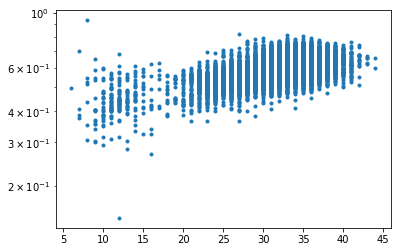

In [161]:
plt.plot(np.array(full_cat.N_match),full_cat.slope,'.')
plt.yscale("log")
# plt.xscale("log")

# plt.plot(half_cat.N_match, half_cat.slope,'.')

In [115]:
cat = pd.read_csv("/home/kuiack/AARTFAAC_catalogue.csv")

In [10]:
np.append(full_cat.int_err,half_cat.int_err)[~np.isfinite(np.append(full_cat.int_err,half_cat.int_err))]

array([inf, inf, inf, inf, inf])

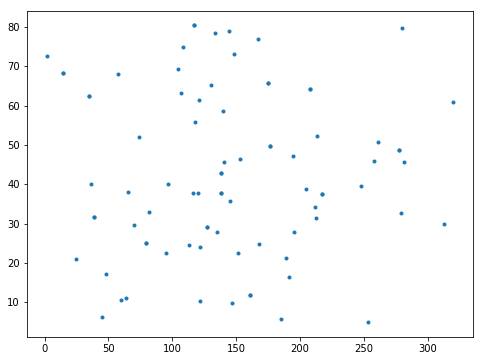

In [42]:

indexes = np.random.randint(0,167,83)
plt.figure(figsize=(8,6))
plt.plot(cat.ra.iloc[indexes],cat.decl.iloc[indexes],".")


[ 36.  45.  86. 117. 156. 114. 161.  29.  34.  83.  30.  13.  70.  91.
  23.  35. 127. 132.  68. 165.  16. 122.  10. 163. 113.  81.  22. 130.
 128.  38. 123.  78.  11. 162.   6.  93.  44. 154. 110. 160.  25.]


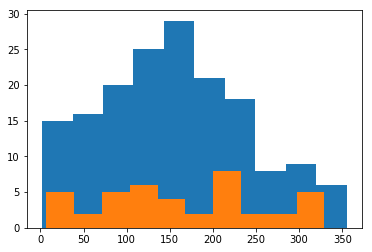

In [127]:
indexes = np.random.choice(np.linspace(0,166,167),size=41,replace=False)
print indexes
x = plt.hist(cat.ra)
x = plt.hist(cat.ra.iloc[indexes])

In [128]:
third_cat = cat.iloc[indexes]

In [123]:
third_cat.to_csv("/home/kuiack/third_AARTFAAC_catalogue.csv", index=False)


In [12]:
data = pd.read_csv("/home/kuiack/half_AARTFAAC_catalogue.csv")

In [14]:
data.drop(data[data.f_int == 71.86]

,N,Name,decl,decl_err,f_int,f_int_err,loc,loc_err,ra,ra_err,runcatid,scale,scale_err,skew,skew_err
2,8780,J1523+076,7.66,0.08,71.86,0.13,66.71,0.23,230.82,0.04,148,9.52,0.16,1.37,0.08
21,8780,J1523+076,7.66,0.08,71.86,0.13,66.71,0.23,230.82,0.04,148,9.52,0.16,1.37,0.08


In [26]:
half_cat = half_cat[np.isfinite(half_cat.int_err)]

In [47]:
len(full_cat)

9050

In [67]:
y = [~np.isnan(y)]

False

In [91]:
np.all([np.array([True,False,False]),  np.array([True,True,False])],0)

array([ True, False, False])

In [18]:
import os
import glob
images = sorted(
    glob.glob(
        os.path.expanduser("/data/AS_20160905_1SB/2016-09-05T18:[4,5]*S298*.fits")
    )
) + sorted(
    glob.glob(
        os.path.expanduser("/data/AS_20160905_1SB/2016-09-05T19:[0,1]*S298*.fits")
    )
)
len(images)

154

In [32]:
for i in ["295","296","297","298","299","300","301","302",
          "313","314","315","316","317","318","319","320"]:

    
    images = glob.glob("/data/AS_20160905_1SB_flux2/*"+i+"*")
    print i, len(images)

295 2347
296 2349
297 2339
298 2358
299 2356
300 2347
301 2359
302 2359
313 2358
314 2359
315 2360
316 2360
317 2359
318 2354
319 2360
320 2359


In [38]:
def gaussian(x,A, mu, sig):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
from scipy.stats import norm


0.73698043142


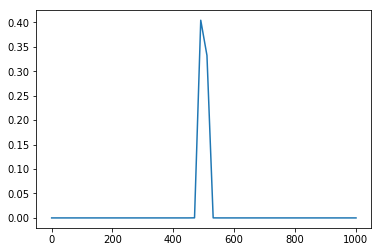

In [44]:
x_values = np.linspace(0, 1001)

vals = (1, 500, 17./2.355)

plt.plot(x_values, gaussian(x_values, vals[0], vals[1], vals[2]))

print np.sum(gaussian(x_values, vals[0], vals[1], vals[2] ))

In [41]:
rv = norm(loc = 1., scale = 1.0)
x = np.arange(-10, 10, .1)
plt.plot(x, rv.pdf(x, normed=False))

TypeError: pdf() got an unexpected keyword argument 'normed'

In [3]:
cal_files = "201907301801 201907301405 201907301304 201907301203 \
201907301102 201907301001 201907300900 201907290953 \
201907290935 201907290920 201907220648 201907201832 \
201907081647 201907071847 201907031737 201907021807 \
201907021706 201907021605 201907021504 201907021403 \
201907021302 201907021201 201907021100 201907021002 \
201907020902 201905170717 201905152347 201905151354 \
201905151343 201905151256 201905151245 201905140710 \
201905122239 201905101456 201905091545 201905090332 \
201905081441 201905081430 201905081415 201905080846 \
201905080833 201905071454 201905071305 201905070241 \
201905021128 201905020430 201905011406 201904292117"

In [4]:
cal_files.split(" ")

['201907301801',
 '201907301405',
 '201907301304',
 '201907301203',
 '201907301102',
 '201907301001',
 '201907300900',
 '201907290953',
 '201907290935',
 '201907290920',
 '201907220648',
 '201907201832',
 '201907081647',
 '201907071847',
 '201907031737',
 '201907021807',
 '201907021706',
 '201907021605',
 '201907021504',
 '201907021403',
 '201907021302',
 '201907021201',
 '201907021100',
 '201907021002',
 '201907020902',
 '201905170717',
 '201905152347',
 '201905151354',
 '201905151343',
 '201905151256',
 '201905151245',
 '201905140710',
 '201905122239',
 '201905101456',
 '201905091545',
 '201905090332',
 '201905081441',
 '201905081430',
 '201905081415',
 '201905080846',
 '201905080833',
 '201905071454',
 '201905071305',
 '201905070241',
 '201905021128',
 '201905020430',
 '201905011406',
 '201904292117']

In [10]:
import os
import sys
import glob
import numpy as np




cal_list = [glob.glob("/mnt/ais*/*"+x+".cal") for x in cal_files.split(" ")]

print(cal_list)
for cal_file in [item for sublist in cal_list for item in sublist]:
    print "Deleting {}".format(cal_file)
    os.popen("rm  {}".format(cal_file))

# sys.exit()


[['/mnt/ais006/317-201907301801.cal', '/mnt/ais006/318-201907301801.cal', '/mnt/ais004/313-201907301801.cal', '/mnt/ais004/301-201907301801.cal', '/mnt/ais004/302-201907301801.cal', '/mnt/ais002/296-201907301801.cal', '/mnt/ais002/295-201907301801.cal', '/mnt/ais002/297-201907301801.cal', '/mnt/ais005/315-201907301801.cal', '/mnt/ais005/316-201907301801.cal', '/mnt/ais005/314-201907301801.cal', '/mnt/ais007/319-201907301801.cal', '/mnt/ais007/320-201907301801.cal', '/mnt/ais003/300-201907301801.cal', '/mnt/ais003/298-201907301801.cal', '/mnt/ais003/299-201907301801.cal'], ['/mnt/ais006/318-201907301405.cal', '/mnt/ais006/317-201907301405.cal', '/mnt/ais004/301-201907301405.cal', '/mnt/ais004/313-201907301405.cal', '/mnt/ais004/302-201907301405.cal', '/mnt/ais002/295-201907301405.cal', '/mnt/ais002/296-201907301405.cal', '/mnt/ais002/297-201907301405.cal', '/mnt/ais005/316-201907301405.cal', '/mnt/ais005/315-201907301405.cal', '/mnt/ais005/314-201907301405.cal', '/mnt/ais007/319-2019073

['/mnt/ais006/317-201907301801.cal',
 '/mnt/ais006/318-201907301801.cal',
 '/mnt/ais004/313-201907301801.cal',
 '/mnt/ais004/301-201907301801.cal',
 '/mnt/ais004/302-201907301801.cal',
 '/mnt/ais002/296-201907301801.cal',
 '/mnt/ais002/295-201907301801.cal',
 '/mnt/ais002/297-201907301801.cal',
 '/mnt/ais005/315-201907301801.cal',
 '/mnt/ais005/316-201907301801.cal',
 '/mnt/ais005/314-201907301801.cal',
 '/mnt/ais007/319-201907301801.cal',
 '/mnt/ais007/320-201907301801.cal',
 '/mnt/ais003/300-201907301801.cal',
 '/mnt/ais003/298-201907301801.cal',
 '/mnt/ais003/299-201907301801.cal',
 '/mnt/ais006/318-201907301405.cal',
 '/mnt/ais006/317-201907301405.cal',
 '/mnt/ais004/301-201907301405.cal',
 '/mnt/ais004/313-201907301405.cal',
 '/mnt/ais004/302-201907301405.cal',
 '/mnt/ais002/295-201907301405.cal',
 '/mnt/ais002/296-201907301405.cal',
 '/mnt/ais002/297-201907301405.cal',
 '/mnt/ais005/316-201907301405.cal',
 '/mnt/ais005/315-201907301405.cal',
 '/mnt/ais005/314-201907301405.cal',
 

array([ ['/mnt/ais006/317-201907301801.cal', '/mnt/ais006/318-201907301801.cal', '/mnt/ais004/313-201907301801.cal', '/mnt/ais004/301-201907301801.cal', '/mnt/ais004/302-201907301801.cal', '/mnt/ais002/296-201907301801.cal', '/mnt/ais002/295-201907301801.cal', '/mnt/ais002/297-201907301801.cal', '/mnt/ais005/315-201907301801.cal', '/mnt/ais005/316-201907301801.cal', '/mnt/ais005/314-201907301801.cal', '/mnt/ais007/319-201907301801.cal', '/mnt/ais007/320-201907301801.cal', '/mnt/ais003/300-201907301801.cal', '/mnt/ais003/298-201907301801.cal', '/mnt/ais003/299-201907301801.cal'],
       ['/mnt/ais006/318-201907301405.cal', '/mnt/ais006/317-201907301405.cal', '/mnt/ais004/301-201907301405.cal', '/mnt/ais004/313-201907301405.cal', '/mnt/ais004/302-201907301405.cal', '/mnt/ais002/295-201907301405.cal', '/mnt/ais002/296-201907301405.cal', '/mnt/ais002/297-201907301405.cal', '/mnt/ais005/316-201907301405.cal', '/mnt/ais005/315-201907301405.cal', '/mnt/ais005/314-201907301405.cal', '/mnt/ais0